In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [2]:
data = pd.read_csv('CustomerChurn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The datatypes of Total Charges should be in float

In [7]:
# Replace any empty values 
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

# Convert the 'TotalCharges' column from string to float
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [8]:
data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [9]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
data.dropna(axis=0, inplace=True)

In [11]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
for i in data.columns:
    print(i,data[i].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (autom

In [13]:
categorical_col = data.select_dtypes('object').columns
categorical_col = categorical_col.drop('customerID')
categorical_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

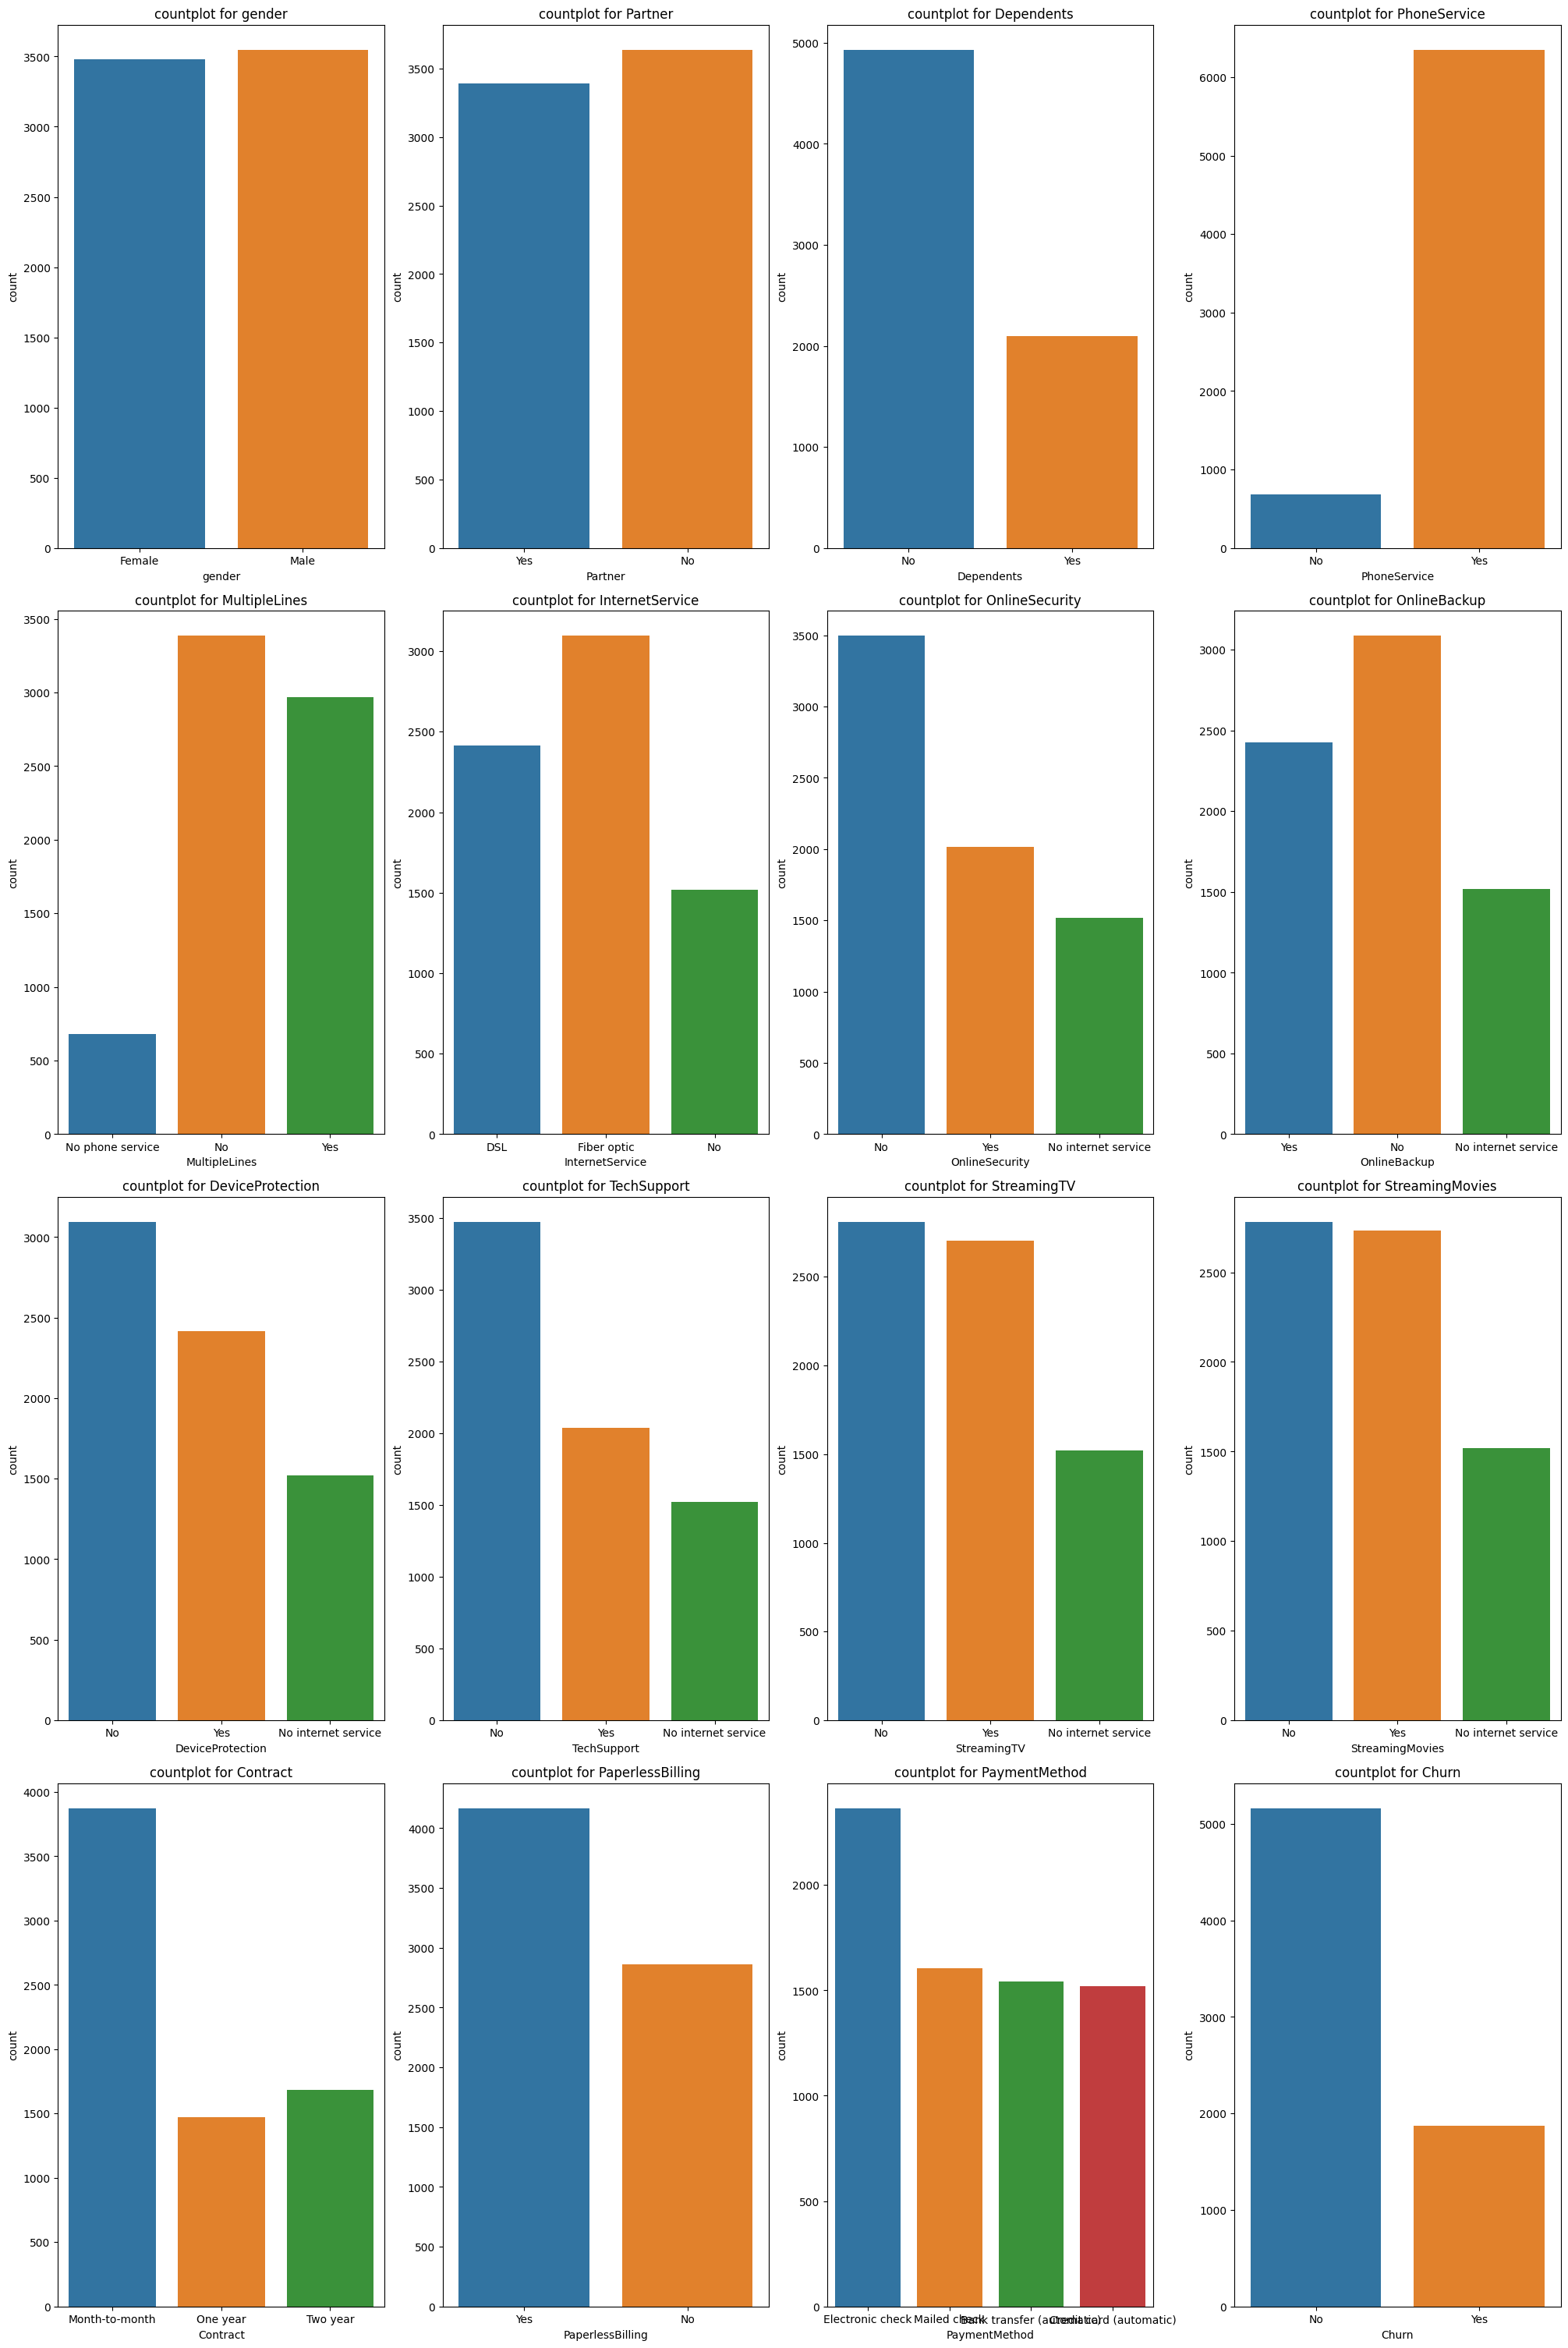

In [14]:
fig, axes = plt.subplots(nrows =4,ncols = 4, figsize = (20, 30), layout = 'constrained')
axes = axes.flatten()
a = 0
for index,colname in enumerate(categorical_col):
    colors = {"yes": "green", "no": "red"}
    sns.countplot(x = data[colname], ax = axes[index])
    axes[index].set_title(f"countplot for {colname}")

In [15]:
data['MultipleLines'].replace({'No phone service':'No'}, inplace=True)


In [16]:
columns_to_replace = ['OnlineSecurity', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [17]:
for column in columns_to_replace:
    data[column].replace({'No internet service': 'No'}, inplace = True)

In [18]:
yes_no = ['Partner','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','Dependents','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn'] 

for i in yes_no:
    data[i].replace({'Yes':1,'No':0},inplace=True)
    

In [19]:
for i in data.columns:
    print(i,data[i].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService [0 1]
MultipleLines [0 1]
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
StreamingTV [0 1]
StreamingMovies [0 1]
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling [1 0]
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn [0 1]


<AxesSubplot: >

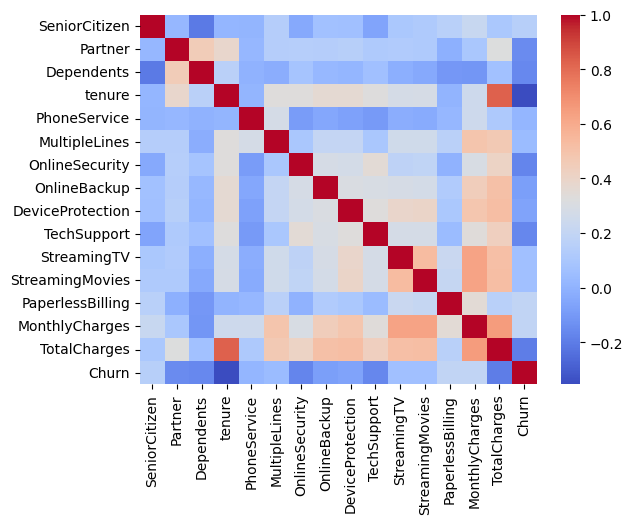

In [20]:
corre = data.corr()
sns.heatmap(corre, cmap='coolwarm')

In [21]:
dummy_columns = ['gender','InternetService','Contract','PaymentMethod']

In [22]:
 
dummy_variables = pd.get_dummies(data[dummy_columns]) 


In [23]:
dummy_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   gender_Female                            7032 non-null   uint8
 1   gender_Male                              7032 non-null   uint8
 2   InternetService_DSL                      7032 non-null   uint8
 3   InternetService_Fiber optic              7032 non-null   uint8
 4   InternetService_No                       7032 non-null   uint8
 5   Contract_Month-to-month                  7032 non-null   uint8
 6   Contract_One year                        7032 non-null   uint8
 7   Contract_Two year                        7032 non-null   uint8
 8   PaymentMethod_Bank transfer (automatic)  7032 non-null   uint8
 9   PaymentMethod_Credit card (automatic)    7032 non-null   uint8
 10  PaymentMethod_Electronic check           7032 non-null   uint8
 11  Paym

In [24]:
data[dummy_variables.columns] = dummy_variables

# Drop the original categorical columns
data.drop(columns=dummy_columns, inplace=True)

In [25]:
data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [26]:
numeric_cols = data[['tenure','MonthlyCharges','TotalCharges']]

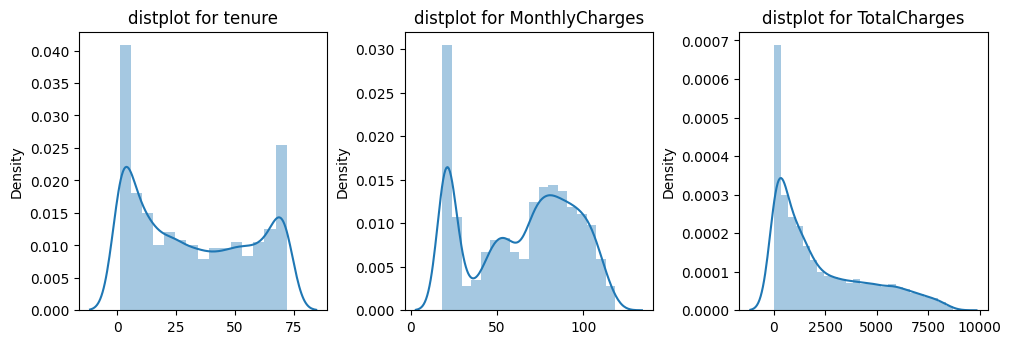

In [27]:
fig, axes = plt.subplots(nrows =1,ncols = 3, figsize = (10, 3.33), layout = 'constrained')
axes = axes.flatten()
a = 0
for index,colname in enumerate(numeric_cols.columns):
    sns.distplot(x = data[colname], ax = axes[index])
    axes[index].set_title(f"distplot for {colname}")

In [28]:
numeric_cols.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [29]:
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)

## using standard scalar

In [30]:
X = data.drop(['Churn','customerID'],axis=1)
y = data['Churn']

In [31]:
num_col = ['tenure','MonthlyCharges','TotalCharges']

In [32]:
X.sample(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2888,1,0,1,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1872,0,1,1,41,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3458,0,0,0,26,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
6228,0,0,1,70,1,1,1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
952,0,0,0,22,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [33]:
ss = StandardScaler()

In [34]:
X[num_col] = ss.fit_transform(X[num_col])

In [35]:
X.sample(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5536,0,0,0,-0.954296,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1624,0,1,0,0.960670,1,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3310,1,0,0,-1.280248,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2212,0,0,0,-0.913552,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2634,0,1,0,-1.280248,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0


## Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,stratify=y, test_size=0.2, random_state=42)

In [38]:
print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

(5625, 27) (1407, 27)
(5625,) (1407,)


In [39]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.734222
1    0.265778
Name: Churn, dtype: float64
0    0.734186
1    0.265814
Name: Churn, dtype: float64


## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log_reg = LogisticRegression(penalty='l1',solver='liblinear')

In [42]:
log_reg.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [43]:
y_test_pred_log = log_reg.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,accuracy_score

In [45]:
#using normal log reg l2 and solver = liblinear
report = classification_report(y_test,y_test_pred_log)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [46]:
conf_matrix = confusion_matrix(y_test,y_test_pred_log)
conf_matrix

array([[917, 116],
       [161, 213]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

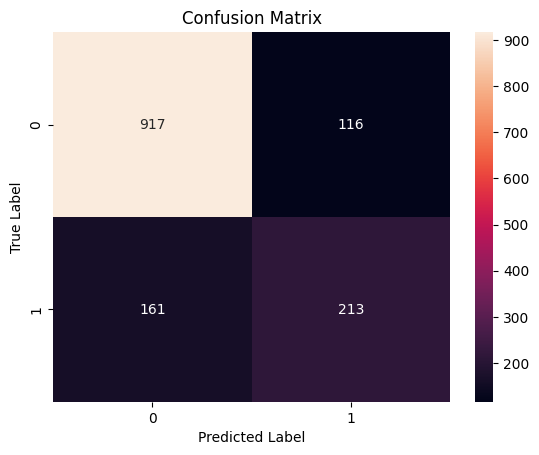

In [47]:
sns.heatmap(conf_matrix,annot=True, fmt = 'd')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')


In [48]:
y_test_pred_log_prob = log_reg.predict_proba(X_test)
y_test_pred_log_prob

array([[0.98179298, 0.01820702],
       [0.41268049, 0.58731951],
       [0.99510983, 0.00489017],
       ...,
       [0.86955367, 0.13044633],
       [0.97420878, 0.02579122],
       [0.99541517, 0.00458483]])

In [49]:
fpr,tpr,thresholds = roc_curve(y_test,y_test_pred_log_prob[:,1])

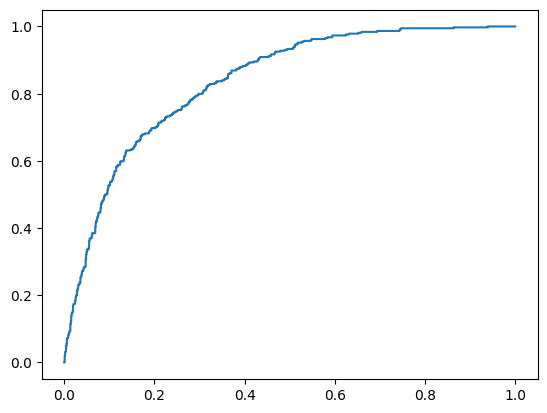

In [50]:
plt.plot(fpr,tpr)
plt.show()

In [51]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4,4,20),
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000]
}
rs = RandomizedSearchCV(LogisticRegression(), param_distributions= params, cv = 5)
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [52]:
best_params_lr = rs.best_params_

print('Best Hyperparameters:', best_params_lr)
tuned_model_lr = rs.best_estimator_

Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 5000, 'C': 4.281332398719396}


In [53]:
rs.score(X_test,y_test)

0.8038379530916845

In [54]:
y_test_pred_log_tuned = tuned_model_lr.predict(X_test)

In [55]:
report = classification_report(y_test,y_test_pred_log_tuned)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



## Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [57]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
y_test_pred_dt = dt.predict(X_test)

In [59]:
report = classification_report(y_test,y_test_pred_dt)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1033
           1       0.46      0.47      0.47       374

    accuracy                           0.71      1407
   macro avg       0.63      0.64      0.63      1407
weighted avg       0.71      0.71      0.71      1407



In [60]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [61]:
from sklearn.model_selection import RandomizedSearchCV


In [62]:
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [63]:
best_params = random_search.best_params_
print('Best Hyperparameters:', best_params)
tuned_model = random_search.best_estimator_

Best Hyperparameters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'gini'}


In [64]:
y_test_pred_dt_tuned = tuned_model.predict(X_test)

In [65]:
random_search.score(X_test,y_test)

0.7874911158493249

In [66]:
report = classification_report(y_test,y_test_pred_dt_tuned)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1033
           1       0.60      0.63      0.61       374

    accuracy                           0.79      1407
   macro avg       0.73      0.74      0.73      1407
weighted avg       0.79      0.79      0.79      1407



## Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [68]:
rf = RandomForestClassifier()

In [69]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
y_test_pred_rf = rf.predict(X_test)

In [71]:
report = classification_report(y_test,y_test_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.79      1407



In [72]:
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

In [73]:
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CD1758C890>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CD15263750>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CD0A357450>},
                   random_state=42, scoring='neg_mean_squared_error')

In [74]:
print("Best Hyperparameters:")
print(random_search.best_params_)


Best Hyperparameters:
{'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 19, 'n_estimators': 162}


In [75]:
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, min_samples_leaf=3, min_samples_split=19,
                       n_estimators=162)

In [76]:
y_test_pred_rf_tuned = best_model.predict(X_test)

In [77]:
report = classification_report(y_test,y_test_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.79      1407



## XGBooster

In [78]:
from xgboost import XGBClassifier

In [79]:
xg = XGBClassifier()

In [80]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [81]:
y_test_pred_xg = xg.predict(X_test)

In [82]:
report = classification_report(y_test,y_test_pred_xg)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1033
           1       0.58      0.52      0.55       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.70      1407
weighted avg       0.76      0.77      0.77      1407



In [83]:
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
}

In [84]:
random_search = RandomizedSearchCV(xg, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

print("Best Hyperparameters:")
print(random_search.best_params_)

Best Hyperparameters:
{'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 63, 'subsample': 0.6}


In [85]:
y_test_pred_xg_tuned = random_search.predict(X_test)

In [86]:
report = classification_report(y_test,y_test_pred_xg_tuned)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



In [87]:
accuracy_scores = {
    'Logistic Regression' : round(accuracy_score(y_test,y_test_pred_log), 2),
    'Logistic Regression tuned' : round(accuracy_score(y_test,y_test_pred_log_tuned), 2),
    'Decision Tree' : round(accuracy_score(y_test,y_test_pred_dt), 2),
    'Decision Tree tuned' : round(accuracy_score(y_test,y_test_pred_dt_tuned), 2),
    'Random Forest' : round(accuracy_score(y_test,y_test_pred_rf), 2),
    'Random Forest tuned' : round(accuracy_score(y_test,y_test_pred_rf_tuned), 2),
    'XG Booster' : round(accuracy_score(y_test,y_test_pred_xg), 2),
    'XG Booster tuned' : round(accuracy_score(y_test,y_test_pred_xg_tuned), 2),
}
accuracy_scores

{'Logistic Regression': 0.8,
 'Logistic Regression tuned': 0.8,
 'Decision Tree': 0.71,
 'Decision Tree tuned': 0.79,
 'Random Forest': 0.79,
 'Random Forest tuned': 0.79,
 'XG Booster': 0.77,
 'XG Booster tuned': 0.79}

In [88]:
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy Score'])
accuracy_df

,Model,Accuracy Score
0,Logistic Regression,0.80
1,Logistic Regression tuned,0.80
2,Decision Tree,0.71
3,Decision Tree tuned,0.79
4,Random Forest,0.79
5,Random Forest tuned,0.79
6,XG Booster,0.77
7,XG Booster tuned,0.79
